In [1]:
import utils
import classes
import h5py
import pandas as pd
from keras.layers import *
from keras import Model
from keras.models import Sequential
from keras.layers.advanced_activations import PReLU
from keras import regularizers
import numpy as np
import keras, time
import keras.backend as K
import tensorflow as tf
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
bg_momenta,bg_labels=utils.loadJetMomentaBenchmark("background_val.h5",nConstituents=40)

Loading indices from None to 100000

Mean label
0.0



In [3]:
bg_dataset= h5py.File("bg_dataset.h5", "w")

In [4]:
bg_dataset.create_dataset('momenta', data=bg_momenta)
bg_dataset.create_dataset('labels', data=bg_labels)

<HDF5 dataset "labels": shape (100000, 2), type "<f4">

In [5]:
sig_momenta,sig_labels=utils.loadJetMomentaBenchmark("signal_val.h5",nConstituents=40)
sig_dataset= h5py.File("sig_dataset.h5", "w")

Loading indices from None to 100000

Mean label
1.0



In [6]:
sig_dataset.create_dataset('momenta', data=sig_momenta)
sig_dataset.create_dataset('labels', data=sig_labels)

<HDF5 dataset "labels": shape (100000, 2), type "<f4">

In [7]:

def loadData(filenames, nJets=slice(200000), nConstituents=40):
    with h5py.File(filenames[0], 'r') as f:
        bg_momenta = f['momenta'][nJets, :nConstituents, :]
        bg_labels = np.zeros(len(bg_momenta))
    
    with h5py.File(filenames[1], 'r') as f:
        sig_momenta = f['momenta'][nJets, :nConstituents, :]
        sig_labels = np.ones(len(sig_momenta))

    momenta = np.append(bg_momenta, sig_momenta, axis=0)

    labels = keras.utils.to_categorical(
            np.append(bg_labels, sig_labels), 2)
    indices = np.random.permutation(len(labels))
    print(momenta.shape, labels.shape)
    return momenta[indices], labels[indices]


In [8]:
vectors, labels = loadData(
                filenames = ["bg_dataset.h5", "sig_dataset.h5"]
                )

(200000, 4, 40) (200000, 2)


In [9]:
    model = classes.LoLaClassifier(nConstituents=40, nAdded=10).model


In [10]:
    model.compile(
            optimizer=keras.optimizers.Adam(lr=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['acc'])


In [11]:
    print(model.summary())


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4, 40)             0         
_________________________________________________________________
cola (CoLa)                  (None, 4, 50)             400       
_________________________________________________________________
lola (LoLa)                  (None, 7, 50)             2704      
_________________________________________________________________
flatten_1 (Flatten)          (None, 350)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               35100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510 

In [12]:
history = model.fit(vectors, labels,
        verbose=2,
        batch_size=1024,
        validation_split=0.2,
        epochs=500)

Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 2s - loss: 3.3760 - acc: 0.7722 - val_loss: 1.6788 - val_acc: 0.8123
Epoch 2/500
 - 2s - loss: 1.3716 - acc: 0.8206 - val_loss: 1.0979 - val_acc: 0.8254
Epoch 3/500
 - 2s - loss: 0.9449 - acc: 0.8317 - val_loss: 0.8037 - val_acc: 0.8377
Epoch 4/500
 - 2s - loss: 0.7128 - acc: 0.8427 - val_loss: 0.6343 - val_acc: 0.8488
Epoch 5/500
 - 2s - loss: 0.5803 - acc: 0.8505 - val_loss: 0.5356 - val_acc: 0.8515
Epoch 6/500
 - 2s - loss: 0.4924 - acc: 0.8583 - val_loss: 0.4707 - val_acc: 0.8543
Epoch 7/500
 - 2s - loss: 0.4321 - acc: 0.8643 - val_loss: 0.4121 - val_acc: 0.8711
Epoch 8/500
 - 2s - loss: 0.3865 - acc: 0.8701 - val_loss: 0.3731 - val_acc: 0.8777
Epoch 9/500
 - 2s - loss: 0.3542 - acc: 0.8755 - val_loss: 0.3474 - val_acc: 0.8752
Epoch 10/500
 - 2s - loss: 0.3304 - acc: 0.8796 - val_loss: 0.3256 - val_acc: 0.8843
Epoch 11/500
 - 2s - loss: 0.3123 - acc: 0.8839 - val_loss: 0.3095 - val_acc: 0.8864
Epoch 12/500
 - 2s - lo

Epoch 97/500
 - 2s - loss: 0.1858 - acc: 0.9254 - val_loss: 0.2325 - val_acc: 0.9074
Epoch 98/500
 - 2s - loss: 0.1858 - acc: 0.9252 - val_loss: 0.2365 - val_acc: 0.9077
Epoch 99/500
 - 2s - loss: 0.1854 - acc: 0.9260 - val_loss: 0.2331 - val_acc: 0.9084
Epoch 100/500
 - 2s - loss: 0.1849 - acc: 0.9260 - val_loss: 0.2337 - val_acc: 0.9078
Epoch 101/500
 - 2s - loss: 0.1855 - acc: 0.9259 - val_loss: 0.2399 - val_acc: 0.9041
Epoch 102/500
 - 2s - loss: 0.1836 - acc: 0.9265 - val_loss: 0.2336 - val_acc: 0.9068
Epoch 103/500
 - 2s - loss: 0.1840 - acc: 0.9264 - val_loss: 0.2440 - val_acc: 0.9092
Epoch 104/500
 - 2s - loss: 0.1835 - acc: 0.9265 - val_loss: 0.2350 - val_acc: 0.9074
Epoch 105/500
 - 2s - loss: 0.1827 - acc: 0.9271 - val_loss: 0.2355 - val_acc: 0.9081
Epoch 106/500
 - 2s - loss: 0.1821 - acc: 0.9268 - val_loss: 0.2348 - val_acc: 0.9077
Epoch 107/500
 - 2s - loss: 0.1816 - acc: 0.9273 - val_loss: 0.2361 - val_acc: 0.9071
Epoch 108/500
 - 2s - loss: 0.1816 - acc: 0.9275 - val_lo

Epoch 193/500
 - 2s - loss: 0.1578 - acc: 0.9380 - val_loss: 0.2692 - val_acc: 0.9029
Epoch 194/500
 - 2s - loss: 0.1572 - acc: 0.9380 - val_loss: 0.2700 - val_acc: 0.9026
Epoch 195/500
 - 2s - loss: 0.1575 - acc: 0.9383 - val_loss: 0.2716 - val_acc: 0.9029
Epoch 196/500
 - 2s - loss: 0.1577 - acc: 0.9381 - val_loss: 0.2720 - val_acc: 0.9036
Epoch 197/500
 - 2s - loss: 0.1565 - acc: 0.9383 - val_loss: 0.2776 - val_acc: 0.9035
Epoch 198/500
 - 2s - loss: 0.1576 - acc: 0.9378 - val_loss: 0.2744 - val_acc: 0.9020
Epoch 199/500
 - 2s - loss: 0.1565 - acc: 0.9384 - val_loss: 0.2771 - val_acc: 0.9044
Epoch 200/500
 - 2s - loss: 0.1563 - acc: 0.9383 - val_loss: 0.2717 - val_acc: 0.9025
Epoch 201/500
 - 2s - loss: 0.1565 - acc: 0.9384 - val_loss: 0.2748 - val_acc: 0.9034
Epoch 202/500
 - 2s - loss: 0.1559 - acc: 0.9388 - val_loss: 0.2752 - val_acc: 0.9029
Epoch 203/500
 - 2s - loss: 0.1555 - acc: 0.9389 - val_loss: 0.2755 - val_acc: 0.9024
Epoch 204/500
 - 2s - loss: 0.1549 - acc: 0.9393 - val

Epoch 289/500
 - 2s - loss: 0.1394 - acc: 0.9457 - val_loss: 0.3260 - val_acc: 0.8990
Epoch 290/500
 - 2s - loss: 0.1395 - acc: 0.9455 - val_loss: 0.3226 - val_acc: 0.8982
Epoch 291/500
 - 2s - loss: 0.1398 - acc: 0.9457 - val_loss: 0.3247 - val_acc: 0.8992
Epoch 292/500
 - 2s - loss: 0.1402 - acc: 0.9452 - val_loss: 0.3229 - val_acc: 0.8984
Epoch 293/500
 - 2s - loss: 0.1397 - acc: 0.9455 - val_loss: 0.3257 - val_acc: 0.8986
Epoch 294/500
 - 2s - loss: 0.1393 - acc: 0.9456 - val_loss: 0.3287 - val_acc: 0.8999
Epoch 295/500
 - 2s - loss: 0.1386 - acc: 0.9460 - val_loss: 0.3272 - val_acc: 0.8998
Epoch 296/500
 - 2s - loss: 0.1387 - acc: 0.9461 - val_loss: 0.3290 - val_acc: 0.8980
Epoch 297/500
 - 2s - loss: 0.1387 - acc: 0.9462 - val_loss: 0.3290 - val_acc: 0.8986
Epoch 298/500
 - 2s - loss: 0.1383 - acc: 0.9459 - val_loss: 0.3269 - val_acc: 0.8983
Epoch 299/500
 - 2s - loss: 0.1389 - acc: 0.9458 - val_loss: 0.3264 - val_acc: 0.8992
Epoch 300/500
 - 2s - loss: 0.1380 - acc: 0.9462 - val

Epoch 385/500
 - 2s - loss: 0.1262 - acc: 0.9513 - val_loss: 0.3857 - val_acc: 0.8927
Epoch 386/500
 - 2s - loss: 0.1255 - acc: 0.9511 - val_loss: 0.3869 - val_acc: 0.8983
Epoch 387/500
 - 2s - loss: 0.1258 - acc: 0.9514 - val_loss: 0.3886 - val_acc: 0.8952
Epoch 388/500
 - 2s - loss: 0.1245 - acc: 0.9520 - val_loss: 0.3823 - val_acc: 0.8964
Epoch 389/500
 - 2s - loss: 0.1246 - acc: 0.9521 - val_loss: 0.3883 - val_acc: 0.8932
Epoch 390/500
 - 2s - loss: 0.1254 - acc: 0.9515 - val_loss: 0.3962 - val_acc: 0.8910
Epoch 391/500
 - 2s - loss: 0.1258 - acc: 0.9511 - val_loss: 0.3901 - val_acc: 0.8949
Epoch 392/500
 - 2s - loss: 0.1244 - acc: 0.9520 - val_loss: 0.3879 - val_acc: 0.8939
Epoch 393/500
 - 2s - loss: 0.1247 - acc: 0.9520 - val_loss: 0.3961 - val_acc: 0.8953
Epoch 394/500
 - 2s - loss: 0.1238 - acc: 0.9521 - val_loss: 0.3930 - val_acc: 0.8938
Epoch 395/500
 - 2s - loss: 0.1241 - acc: 0.9523 - val_loss: 0.3895 - val_acc: 0.8935
Epoch 396/500
 - 2s - loss: 0.1236 - acc: 0.9522 - val

Epoch 481/500
 - 2s - loss: 0.1154 - acc: 0.9557 - val_loss: 0.4610 - val_acc: 0.8910
Epoch 482/500
 - 2s - loss: 0.1152 - acc: 0.9556 - val_loss: 0.4494 - val_acc: 0.8909
Epoch 483/500
 - 2s - loss: 0.1140 - acc: 0.9563 - val_loss: 0.4536 - val_acc: 0.8936
Epoch 484/500
 - 2s - loss: 0.1134 - acc: 0.9565 - val_loss: 0.4557 - val_acc: 0.8943
Epoch 485/500
 - 2s - loss: 0.1140 - acc: 0.9565 - val_loss: 0.4506 - val_acc: 0.8931
Epoch 486/500
 - 2s - loss: 0.1130 - acc: 0.9568 - val_loss: 0.4540 - val_acc: 0.8903
Epoch 487/500
 - 2s - loss: 0.1131 - acc: 0.9574 - val_loss: 0.4560 - val_acc: 0.8940
Epoch 488/500
 - 2s - loss: 0.1137 - acc: 0.9565 - val_loss: 0.4553 - val_acc: 0.8898
Epoch 489/500
 - 2s - loss: 0.1128 - acc: 0.9568 - val_loss: 0.4543 - val_acc: 0.8943
Epoch 490/500
 - 2s - loss: 0.1128 - acc: 0.9571 - val_loss: 0.4598 - val_acc: 0.8911
Epoch 491/500
 - 2s - loss: 0.1122 - acc: 0.9575 - val_loss: 0.4530 - val_acc: 0.8939
Epoch 492/500
 - 2s - loss: 0.1128 - acc: 0.9572 - val

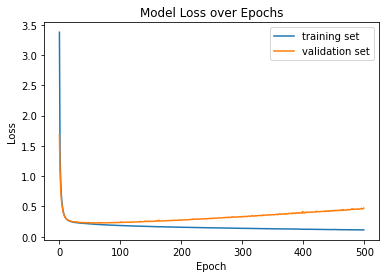

In [13]:

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training set','validation set'])
plt.show()

In [14]:
label = ['t']

def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'particle net ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

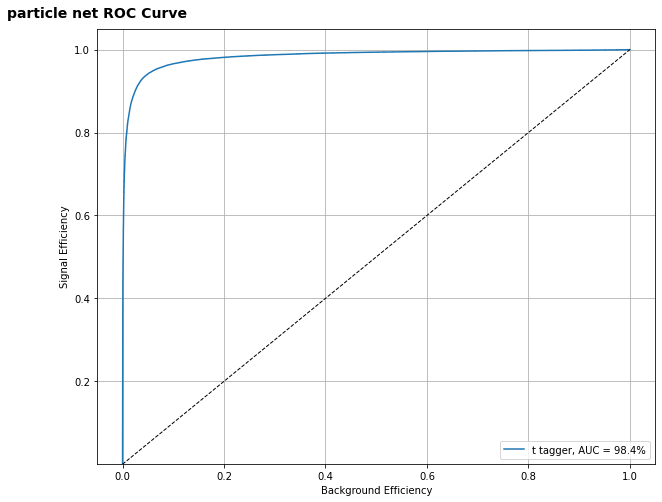

In [15]:
y_pred = makeRoc(X_test, y_test, label, model, outputSuffix='LOLA')